# SOIL PARAMETER SETTING

In [1]:
import sys
sys.path.append('C:/Users/fdifonzo/Google Drive/Ricerca/Lavori conclusi/BerardiDifonzoMasciopintoVurro-1/new submission/pythonCode')

import matplotlib.pyplot as plt
import pandas as pd
from numpy import array

from Config.SoilParameters import SoilParameters
from Config.select_uptake_type import *
from Core.ShootingSol import *

lambda_ = 0.1  # set by user
soil_index = 1  # set by user: see Config.SoilParameters.py
active_uptake = True  # set by user: see Config.uptake_R.py
uptake_type = select_uptake_type(1)  # set by user: se Config.select_uptake_type.py

soil_parameters = SoilParameters()
soil_parameters.get_soil_parameters(soil_index, active_uptake, uptake_type)
Z = soil_parameters.Z

df = pd.DataFrame([(soil_parameters.theta_r, 'cm3*cm-3'),
                   (soil_parameters.theta_S, 'cm3*cm-3'),
                   (soil_parameters.K_S, 'cm/d'),
                   (Z, 'cm'),
                   (soil_parameters.lambda_, 'cm-1')],
                  index=['theta_r', 'theta_S', 'K_S', 'Z', 'lambda'],
                  columns=('Parameters', 'Values'))
print(df)

         Parameters    Values
theta_r        0.00  cm3*cm-3
theta_S        0.48  cm3*cm-3
K_S          175.40      cm/d
Z             25.00        cm
lambda         0.10      cm-1


# INTEGRATION PARAMETER SETTING

In [2]:
T = 3  # set by user
Nt = 80  # set by user
Nz = 150  # set by user
tol = 1e-6  # set by user
bc_type = 'Ex2'  # set by user: see Config.boundary_condition_setter.py

dt = T / Nt
dz = Z / Nz

# NUMERICAL OUTCOMES

In [3]:
shooting_solution = ShootingSol(dt, dz, array([0, T]), array([0, Z]), tol)

shooting_solution.shooting_method(soil_parameters, active_uptake, uptake_type, bc_type)

## GRAPHICAL RESULTS 

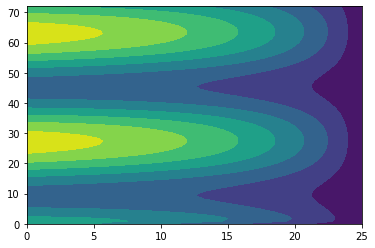

In [4]:
plt.contourf(shooting_solution.z_sol, shooting_solution.t_sol, shooting_solution.f_sol)

plt.show()